In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

from lcc import MODEL_DIR, OUTPUT_DIR
from lcc.dataset import LCCDataset, get_transforms, TRAIN_CLASS_COUNTS, CLASSES

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dataset = LCCDataset(transform=get_transforms(), train=True)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

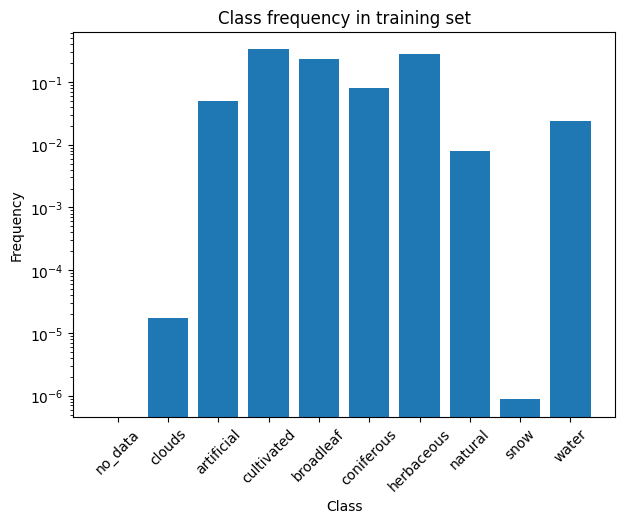

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.bar(range(0,10),TRAIN_CLASS_COUNTS/TRAIN_CLASS_COUNTS.sum())
plt.xticks(range(0,10), CLASSES, rotation=45)
ax.set_title('Class frequency in training set')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
ax.semilogy()
plt.savefig(OUTPUT_DIR.joinpath('class_frequency.png'), bbox_inches='tight', facecolor='white')

In [4]:
CLASSES

['no_data',
 'clouds',
 'artificial',
 'cultivated',
 'broadleaf',
 'coniferous',
 'herbaceous',
 'natural',
 'snow',
 'water']

In [14]:
metrics = np.genfromtxt('/home/nicolas/Projects/land_cover_challenge/output/metrics.csv', delimiter=',')
metrics.shape

(18, 3)

Text(0.5, 1.0, 'Loss and Jaccard Index')

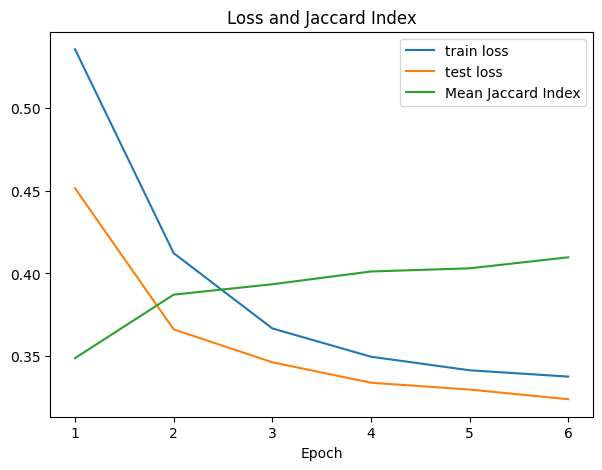

In [20]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(metrics[:6,0], label='train loss')
ax.plot(metrics[6:12,0], label='test loss')
ax.plot(metrics[12:18,0], label='Mean Jaccard Index')
ax.set_xlabel('Epoch')
plt.xticks(range(0,6), range(1,7))
ax.legend()
ax.set_title('Loss and Jaccard Index')